By Mohammad Mahdi Mirza Ali Mohammadi (Hamed Mohammadi)

# display different channels

In [21]:
# mount the drive if needed

# from google.colab import drive
# drive.mount('/content/gdrive')

In [22]:
from PIL import Image, ImageOps
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

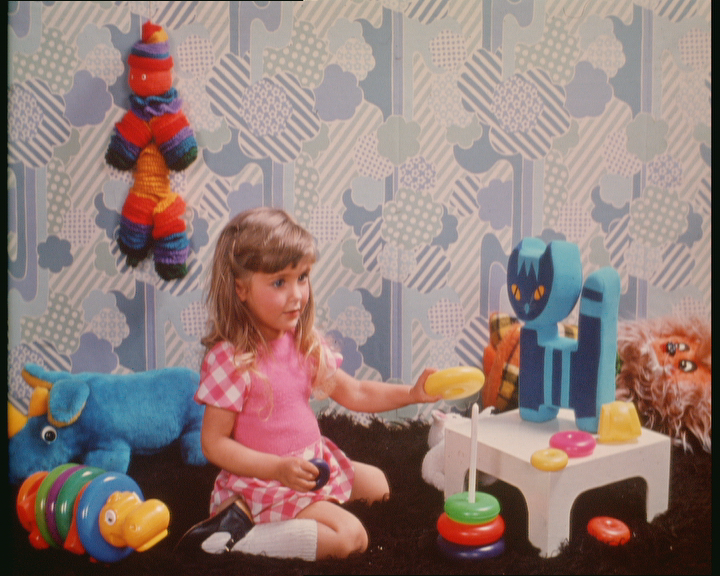

In [23]:
image_path_girl = '/content/drive/MyDrive/Colab_Notebooks/computer_vision_HW/HW2/girl.bmp'
image_path_cornfield = '/content/drive/MyDrive/Colab_Notebooks/computer_vision_HW/HW2/cornfield.bmp'
image_path_flowers = '/content/drive/MyDrive/Colab_Notebooks/computer_vision_HW/HW2/flowers.bmp'
image_path_pens = '/content/drive/MyDrive/Colab_Notebooks/computer_vision_HW/HW2/pens.bmp'
image_path_soccer = '/content/drive/MyDrive/Colab_Notebooks/computer_vision_HW/HW2/soccer.bmp'

im = Image.open(image_path_girl)
im_2 = Image.open(image_path_cornfield)
im_3 = Image.open(image_path_flowers)
im_4 = Image.open(image_path_pens)
im_5 = Image.open(image_path_soccer)

im.show()
# im_2.show()
# im_3.show()
# im_4.show()
# im_5.show()


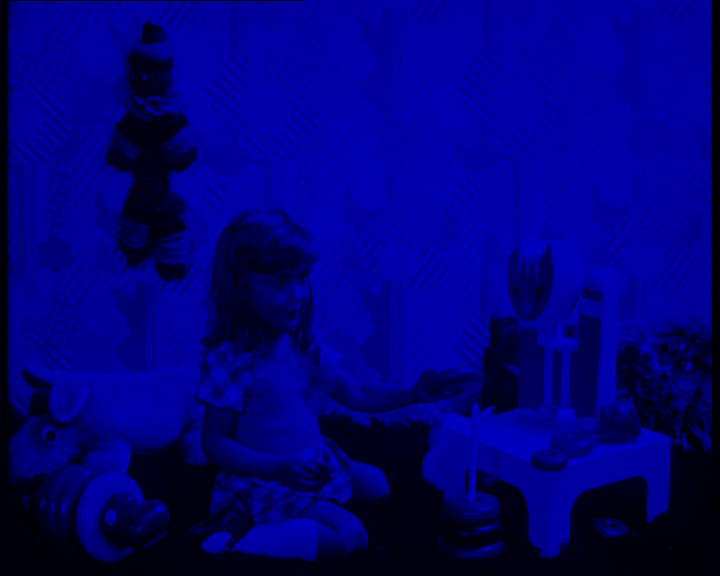

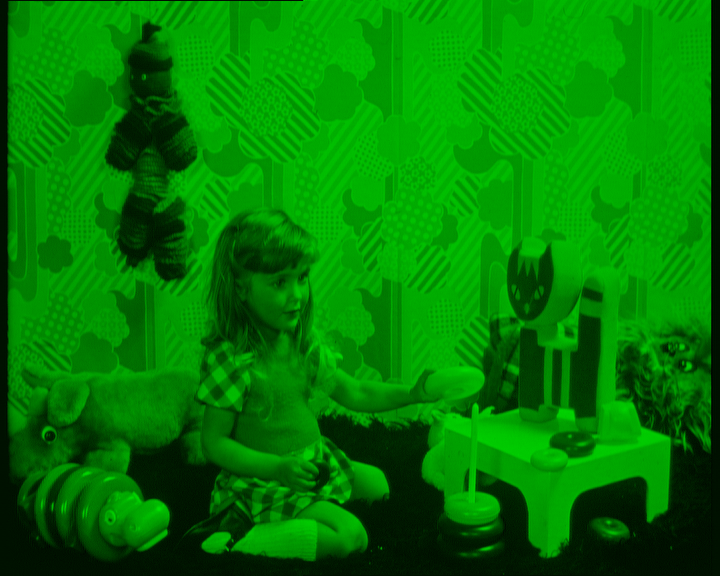

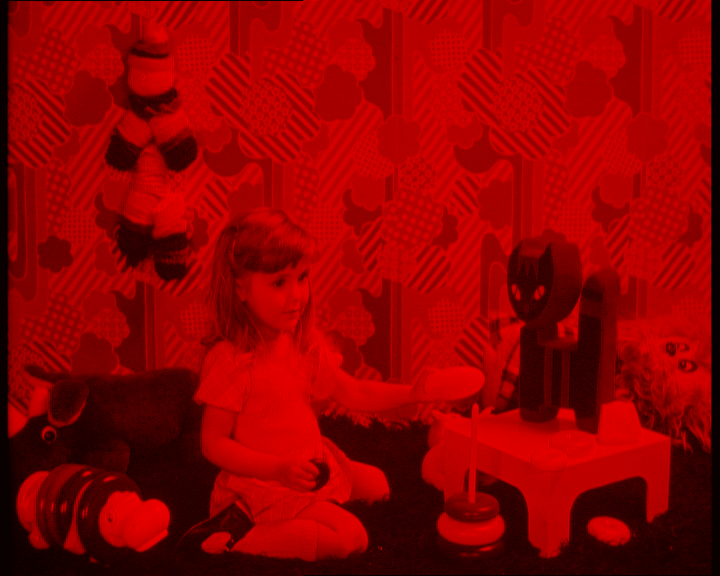

In [24]:
def diff_channels(image_path):
  image_cv = cv2.imread(image_path)

  im_b = image_cv.copy()
  # set green and red channels to 0
  im_b[:, :, 1] = 0
  im_b[:, :, 2] = 0

  im_g = image_cv.copy()
  # set blue and red channels to 0
  im_g[:, :, 0] = 0
  im_g[:, :, 2] = 0

  im_r = image_cv.copy()
  # set blue and green channels to 0
  im_r[:, :, 0] = 0
  im_r[:, :, 1] = 0

  # BGR - Blue
  cv2_imshow(im_b)

  # BGR - Green
  cv2_imshow(im_g)

  # BGR - Red
  cv2_imshow(im_r)

diff_channels(image_path_girl)
# diff_channels(image_path_cornfield)
# diff_channels(image_path_flowers)
# diff_channels(image_path_soccer)
# diff_channels(image_path_pens)


# show image in HSV format

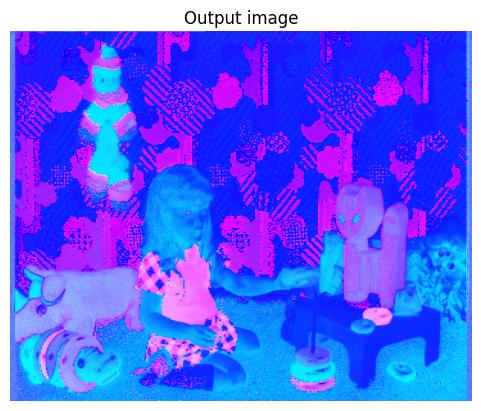

In [25]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.image as mpimg

def HSV_format(image_path):
  image = mpimg.imread(image_path)
  plt.title("Output image")

  hsv = mcolors.rgb_to_hsv(image)
  plt.imshow(hsv)
  plt.axis('off')

HSV_format(image_path_girl)
# HSV_format(image_path_cornfield)
# HSV_format(image_path_flowers)
# HSV_format(image_path_soccer)
# HSV_format(image_path_pens)

# pass the pic through a filter

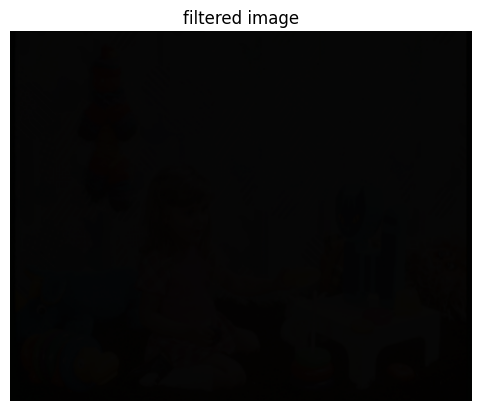

In [26]:
def filter(image):
  image_gray = image
  # for i in r
  im_array = np.array(image_gray)
  filtered_im = (1/2)* np.sqrt(im_array)

  plt.title("filtered image")
  plt.imshow(filtered_im.astype(int))
  plt.axis('off')

filter(im)  #girl
# filter(im_2)  #cornfield
# filter(im_3)  #flowers
# filter(im_4)  #pens
# filter(im_5)  #soccer

# Conv2d function

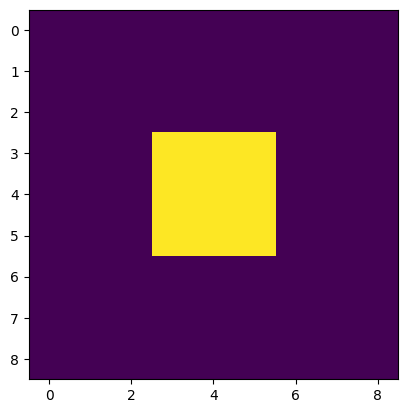

In [27]:
# Simple convolution kernel
kernel = np.array( [ [1,0,1], [0,0,0], [1,0,1] ])

# Create a test image: a white square in the middle
test_img = np.zeros((9, 9))
test_img[3:6, 3:6] = 1
plt.imshow(test_img)

In [28]:
def cov2d(img,kernel):
  out = np.zeros(img.shape)
  for m in range(img.shape[0]):
    for n in range(img.shape[1]):
      sum=0
      for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
          if m+1-i >= 0 and n+1-j >= 0 and m+1-i < img.shape[0] and n+1-j < img.shape[1]:
            sum = sum + (kernel[i][j] * img[m+1-i][n+1-j])
      out[m,n] = sum
  return out

CPU times: user 32.9 ms, sys: 0 ns, total: 32.9 ms
Wall time: 38.7 ms


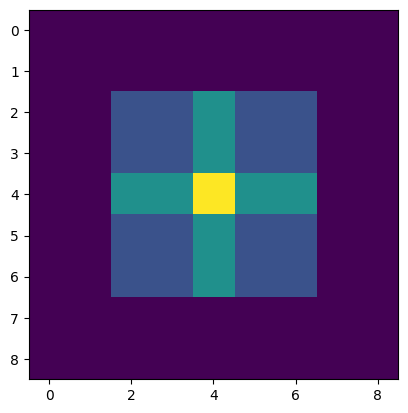

In [29]:
%%time
output = cov2d(test_img, kernel)
plt.imshow(output)

In [30]:
# faster convolution function
def conv_fast(image, kernel):
    image_padded = np.pad(image,pad_width=1,constant_values=0)
    out = np.zeros_like(image)
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            out[y, x] = (kernel * image_padded[y:y + kernel.shape[0], x:x + kernel.shape[1]]).sum()
    return out

it changes the shape of image to calculate convolution faster but the main content remains unchanged

In [31]:
%%time
out_2 = conv_fast(test_img, kernel)
out_2

CPU times: user 1.48 ms, sys: 0 ns, total: 1.48 ms
Wall time: 5.51 ms


array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 2., 1., 1., 0., 0.],
       [0., 0., 1., 1., 2., 1., 1., 0., 0.],
       [0., 0., 2., 2., 4., 2., 2., 0., 0.],
       [0., 0., 1., 1., 2., 1., 1., 0., 0.],
       [0., 0., 1., 1., 2., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# zero_pad function

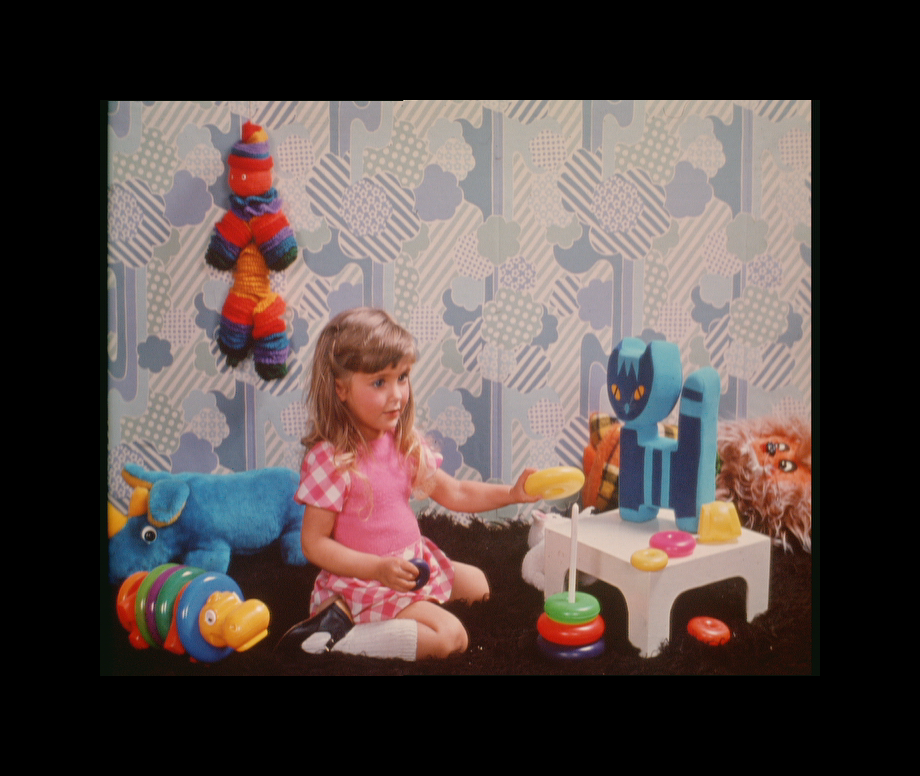

In [32]:
# for types of images in PIL
def zero_pad(image, left, top, right, bottom):
    width, height = image.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(image.mode, (new_width, new_height), (0, 0, 0))
    result.paste(image, (left, top))
    return result

# test:
padded_image = zero_pad(im, 100, 100, 100, 100)
padded_image.show()

In [36]:
# for images in array
def zero_pad_array(img_array, width):
  x, y = img_array.shape
  x_new = x + 2*width
  y_new = y + 2*width
  out = np.zeros((x_new, y_new))
  out[width:width+x , width:width+y] = img_array
  return out

o = zero_pad_array(test_img, 1)
print(test_img)
print('------------------------------')
print(o)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
------------------------------
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# cross_corrolation

In [ ]:
from scipy.signal import correlate2d

def cross_correlation_2d(x, y):
    # Compute correlation
    corr = correlate2d(x, y, mode='same', boundary='symm')
    return corr

cor = cross_correlation_2d(test_img, kernel)
print(cor)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 0. 0.]
 [0. 0. 2. 2. 4. 2. 2. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Template Matching

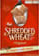

-------------------------
(41, 8)


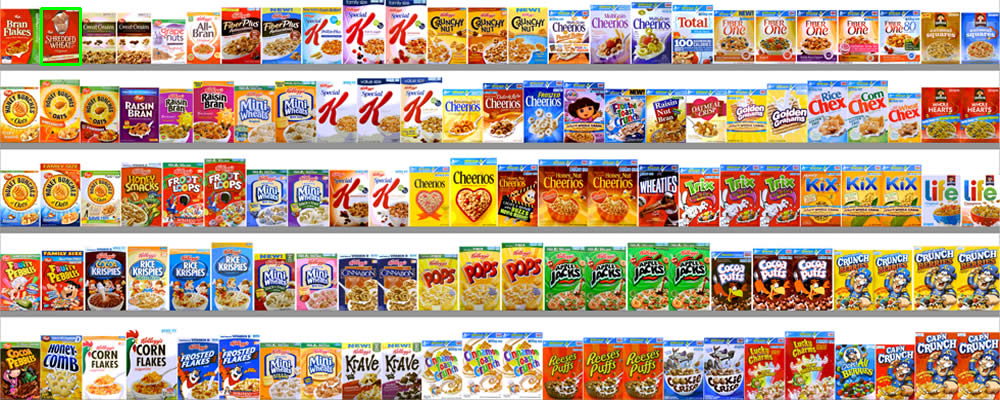

In [ ]:
# grab images
template_path = '/content/drive/MyDrive/Colab_Notebooks/computer_vision_HW/HW2/template.jpg'
shelf_path = '/content/drive/MyDrive/Colab_Notebooks/computer_vision_HW/HW2/shelf.jpg'
template = cv2.imread(template_path)
shelf = cv2.imread(shelf_path)
cv2_imshow(template)
print('-------------------------')
# cv2_imshow(shelf)

# Convert both images to grayscale
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
shelf_gray = cv2.cvtColor(shelf, cv2.COLOR_BGR2GRAY)

# Find the location with the largest correlation coefficient
result = cv2.matchTemplate(template, shelf, cv2.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Determine the bounding box coordinates
print(max_loc)
start_x, start_y = max_loc
end_x = start_x + template.shape[1]
end_y = start_y + template.shape[0]

# Draw the bounding box on the input image
shelf_copy_1 = shelf.copy()
cv2.rectangle(shelf_copy_1, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)
cv2_imshow(shelf_copy_1)

# Template Matching (without using OpenCV)

In [ ]:
# without using OpenCV
im_template = Image.open(template_path).convert('L')
im_shelf = Image.open(shelf_path).convert('L')

# convert images to numpy array
template_np = np.asarray(im_template)
shelf_np = np.asarray(im_shelf)

# normalize images
temp_np_m = template_np - template_np.mean()
shelf_np_m = shelf_np - shelf_np.mean()

cor_TM = correlate2d(shelf_np_m, temp_np_m, boundary='symm', mode='same')
cor_TM

array([[ 138032.62087912,  140495.3021978 ,  111903.21153846, ...,
        -190096.17307692, -197407.77197802, -126470.99450549],
       [ 339320.81043956,  339209.02747253,  280890.70604396, ...,
        -157194.08516484, -163843.07692308,  -89725.89010989],
       [ 385833.12362638,  392481.12087912,  322802.21703297, ...,
        -131446.06593407, -145512.4478022 ,  -94730.4532967 ],
       ...,
       [-268938.37637362, -281987.6510989 , -249152.77197802, ...,
         157809.84615385,    9242.13186813, -107649.24175824],
       [-195772.17857143, -193200.43406593, -162442.36263736, ...,
          -6072.99450549, -107414.43956044, -215868.97527472],
       [ -74332.17032967,  -86482.7967033 ,  -65398.7032967 , ...,
        -230601.73626374, -267775.93406593, -339608.64285714]])

In [ ]:
indices = np.unravel_index(np.argmax(cor_TM), cor_TM.shape)
indices

(35, 60)

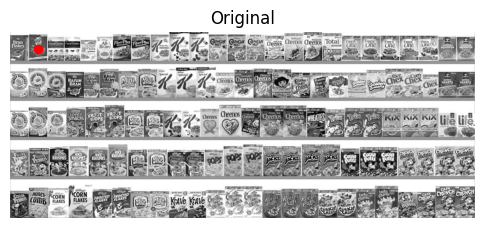

In [ ]:
y, x = indices
import matplotlib.pyplot as plt
fig, (ax_orig) = plt.subplots(1, 1, figsize=(6, 15))
ax_orig.imshow(shelf_np, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_orig.plot(x, y, 'ro')
fig.show()

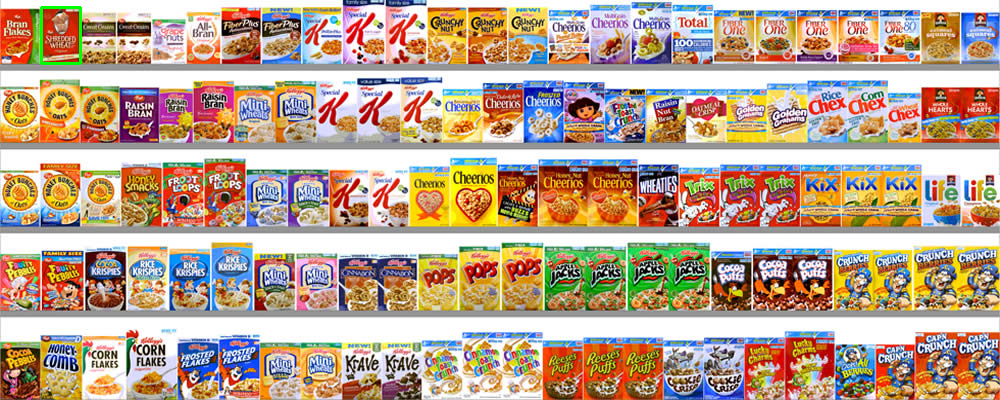

In [ ]:
# Determine the bounding box coordinates
origin_y, origin_x  = indices
start_x = int(origin_x + 0.5 - (template.shape[1])/2)
start_y = int(origin_y - (template.shape[0])/2)
end_x = int(origin_x + 0.5 + (template.shape[1])/2)
end_y = int(origin_y + (template.shape[0])/2)

# Draw the bounding box on the input image
shelf_copy_2 = shelf.copy()
cv2.rectangle(shelf_copy_2, (start_x, start_y), (end_x, end_y), (0, 255, 0), 2)
cv2_imshow(shelf_copy_2)